## Credit Card Fraud Detection

The purpose of this notebook is to try to predict whether or not a specific credit card transaction is fraudulent. The dataset we are using is a Kaggle dataset and can be found here: https://www.kaggle.com/mlg-ulb/creditcardfraud.

This dataset presents a unique challenge, in that the occurrences of fraudulent chareges are significantly fewer than those of non-fraudulent charges (only 0.172% of the total dataset). This lends itself to an anomaly-detection approach. The data has also been anonymized using PCA. There are 28 input components (V1 - V28) with fully anonymized values. While this does remove some data that we could have worked with, it does allow us to focus solely on turning out the best model possible. First we will conduct a thorough exploration of the data. Then we will perform any cleaning that may need to be done. Finally, we will compare a couple unsupervised learning algorithms against each other, and then against several algorithms designed specifically to detect outliers or anomalies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv",header=0,index_col=None)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


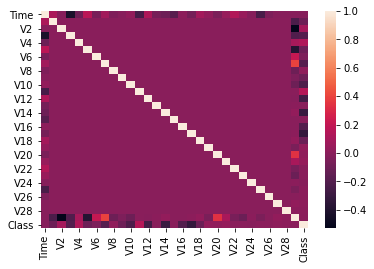

In [3]:
heatmap = sns.heatmap(df.corr())

We can see in the above heatmap that the components are generally not correlated, with correlation values of 0, as would be expected for a set of PCA components. However, it is interesting to note that Amount does exhibit some correlation with the other components. Therefore, it would be worth taking a look at the relationships between Amount and the other components.

In [4]:
charts_df = df.drop(['Time', 'Class'], axis=1)
charts_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


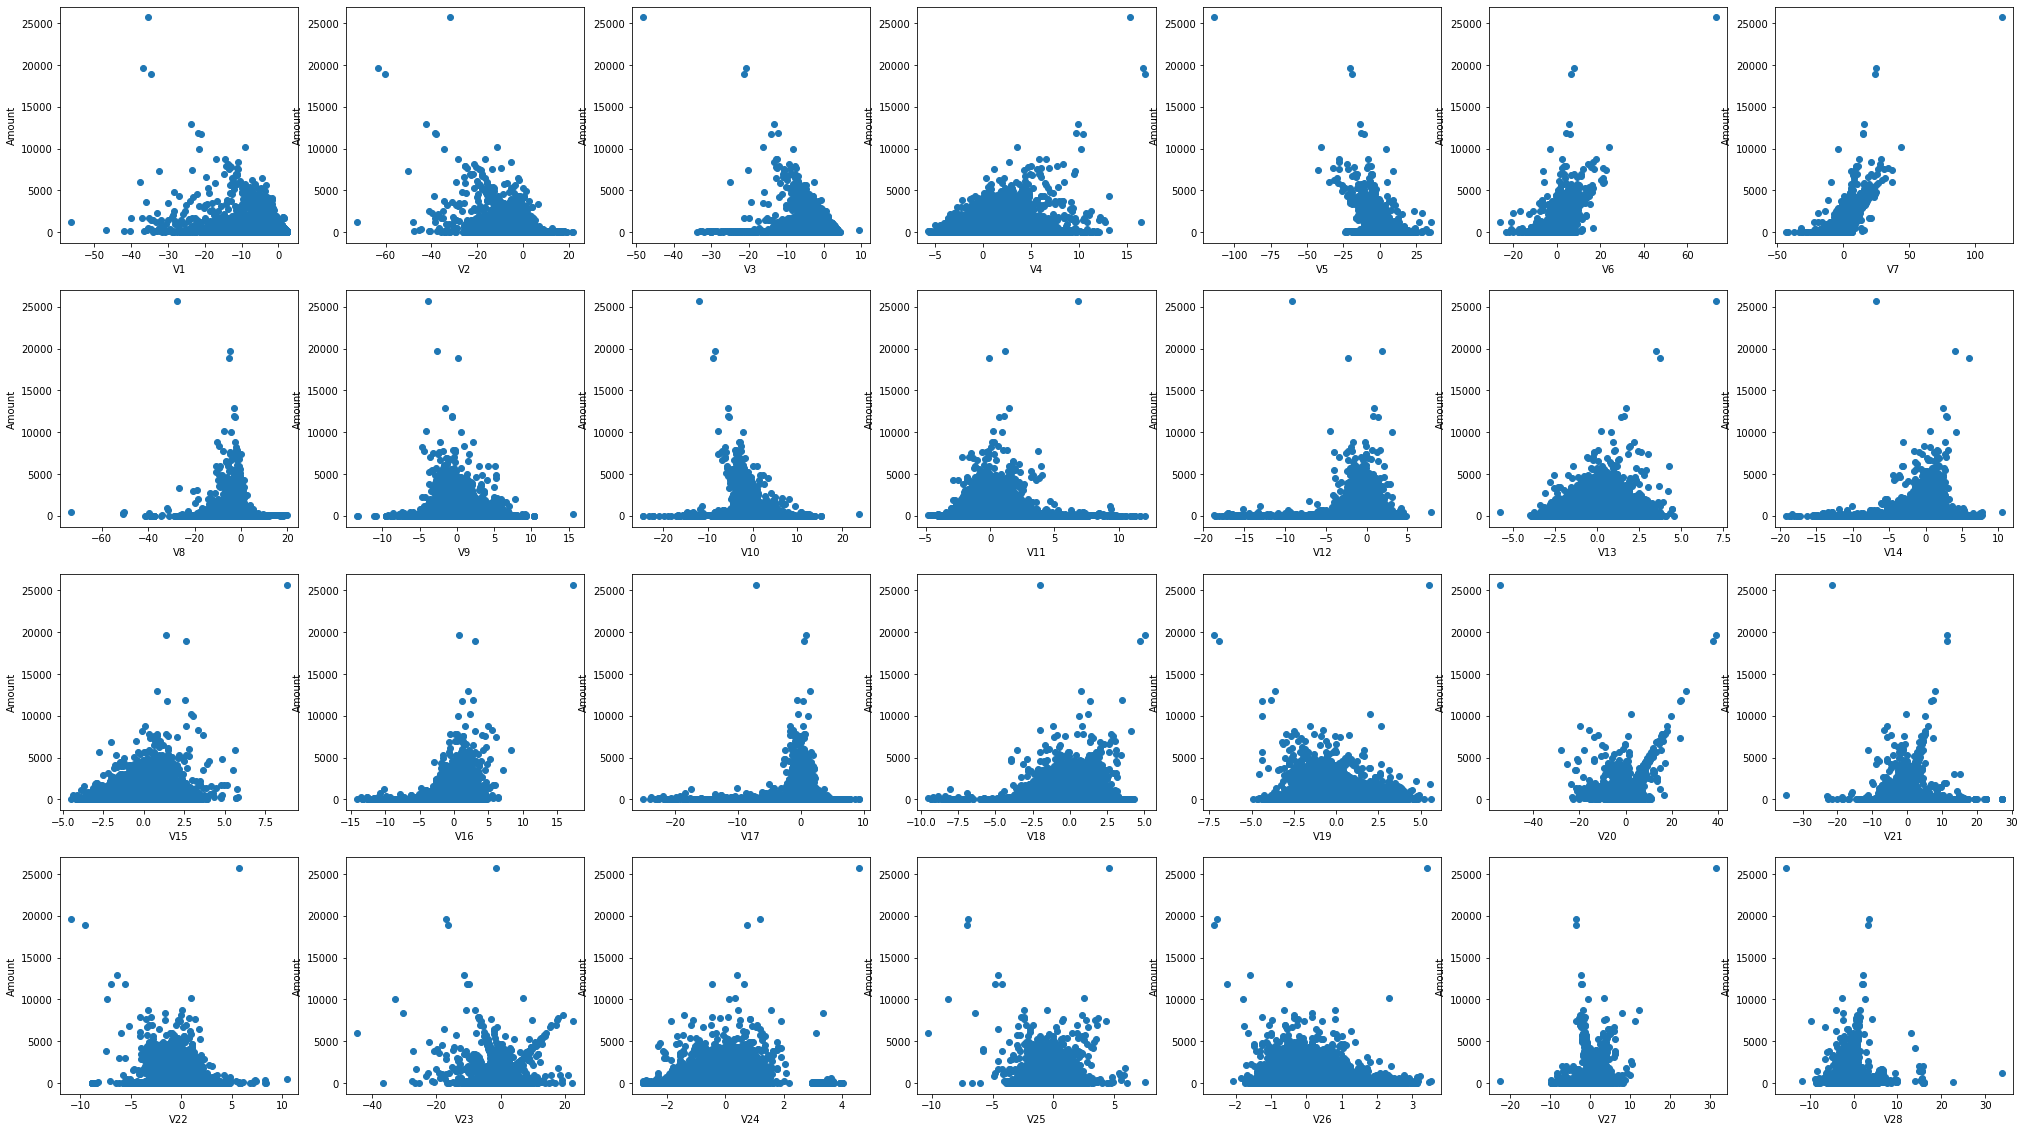

In [5]:
plt.figure(figsize=(35, 20))
for i in range(1,29):
    plt.subplot(4,7,i)
    plt.scatter(charts_df['V{}'.format(i)], charts_df['Amount'])
    plt.xlabel("V{}".format(i))
    plt.ylabel("Amount")
plt.show()

As we can see, there are varying degrees of correlation between the different V-components and the amount spent in the transaction. Notably, we can see clear positive correlations in the plots for V4, V6, and V7, while we see clear negative correlations in the plots for V2, V3, and V5. 

In [6]:
df.isnull().sum() / df.isnull().count()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Due to the nature of the data, there are no missing values. Therefore, there is not much cleaning to do, other than to balance the data. As mentioned above, this will allow us to focus our efforts on creating the best model possible (given our hardware restrictions). First, we will compare the different clustering algorithms.

### Clustering Algorithms

The clustering algorithms we will compare are K-Means and DBSCAN. We could also explore hierarchical clustering and Gaussian mixed models, but since those models would require 22GB of free RAM for this data due to how they work, they are beyond the capabilities of the hardware being used here. We know that there are two potential outcomes for the data - fraudulent and not fraudulent, so we will set our target number of clusters to two. In looking at the plots above, we can also see that the scale of each component is different, so we will have to standardize the scales. Since we do have labels for the data, we will use the Adjusted Rand Index (ARI) to determine the effectiveness of the clustering models.

In [7]:
#initial import of clustering algorithms and metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [8]:
from timeit import default_timer as timer

In [9]:
X = df.drop(['Class'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Due to the nature of the data, we will also have to rebalance it, otherwise our algorithms may struggle to generate meaningful results.

In [10]:
from imblearn.combine import SMOTETomek

In [11]:
smk = SMOTETomek(random_state=1995)
X_res, y_res = smk.fit_sample(X_std, y)

In [12]:
print(len(X_res), len(y_res))

568630 568630


In [13]:
print(len(y_res[y_res==1]))

284315


The oversampling nearly doubled the size of our data, with half of the data points coming from fraudulent transactions and half of the data coming from legitimate transactions. This should help the regular clustering algorithms learn how to detect the fraudulent cases.

In [14]:
k_means = KMeans(n_clusters=2, random_state=1995)
start = timer()
y_pred = k_means.fit_predict(X_res)
end = timer()
print("Time for k-means: {} seconds".format(end - start))

Time for k-means: 2.816702300000543 seconds


In [15]:
print("ARI Score:", metrics.adjusted_rand_score(y_res, y_pred))
acc = metrics.accuracy_score(y_res, y_pred)
print("Accuracy: {}".format(acc))
prec = metrics.precision_score(y_res, y_pred, average='weighted')
print("Precision: {}".format(prec))
rec = metrics.recall_score(y_res, y_pred, average='weighted')
print("Recall: {}".format(rec))
f1 = metrics.f1_score(y_res, y_pred, average='weighted')
print("F1 Score: {}\n".format(f1))

ARI Score: 0.13502234583246236
Accuracy: 0.31627244429593937
Precision: 0.19391129821277994
Recall: 0.31627244429593937
F1 Score: 0.2403539610229247



In [16]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=5)
start = timer()
clusters = dbscan_cluster.fit_predict(X_res)
end = timer()
print(end - start)

120.8359687000011


In [17]:
print(metrics.adjusted_rand_score(y_res, clusters))
acc = metrics.accuracy_score(y_res, clusters)
print("Accuracy: {}".format(acc))
prec = metrics.precision_score(y_res, clusters, average='weighted')
print("Precision: {}".format(prec))
rec = metrics.recall_score(y_res, clusters, average='weighted')
print("Recall: {}".format(rec))
f1 = metrics.f1_score(y_res, clusters, average='weighted')
print("F1 Score: {}\n".format(f1))

0.3584701140283617
Accuracy: 4.748254576789828e-05
Precision: 0.5
Recall: 4.748254576789828e-05
F1 Score: 9.495607402353503e-05



In [18]:
clusters_s = pd.Series(clusters)
print(clusters_s.nunique())

9172


As we can see above, neither the K-means nor the DBSCAN model we ran performed very well. In fact, the DBSCAN model created 9172 unique clusters, which is much higher than the two possible results we have in the data. We will try to tweak the DBSCAN model to try to get better results.

In [19]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
start = timer()
clusters = dbscan_cluster.fit_predict(X_res)
end = timer()
print(end - start)

847.4490117000005


In [20]:
print(metrics.adjusted_rand_score(y_res, clusters))
acc = metrics.accuracy_score(y_res, clusters)
print("Accuracy: {}".format(acc))
prec = metrics.precision_score(y_res, clusters, average='weighted')
print("Precision: {}".format(prec))
rec = metrics.recall_score(y_res, clusters, average='weighted')
print("Recall: {}".format(rec))
f1 = metrics.f1_score(y_res, clusters, average='weighted')
print("F1 Score: {}\n".format(f1))

0.5827724636466234
Accuracy: 1.2310289643529185e-05
Precision: 0.5
Recall: 1.2310289643529185e-05
F1 Score: 2.46199731290579e-05



In [21]:
clusters_s = pd.Series(clusters)
print(clusters_s.nunique())

2734


We can see the performance of the model improving slightly as we tweak the parameters, but we are still getting a worrying number of clusters in the solution. We could continue to tweak the model by increasing min_samples, as we have a considerable number of data points, but the time and effort required to find a good solution that delivers two clusters is probably not worth it. It is also worth noting that increasing the min_samples only increased the time taken to run the model by about 100 seconds, whereas increasing the espilon parameter increased the time to run almost by a factor of 8. Instead of continuing to tweak the DBSCAN parameters, we will move on to anomaly detection-specific algorithms.

### Anomaly Detection Algorithms

In [22]:
## run isolation forest and elliptic envelope without std scaler and smotetomek - it is very effective

from sklearn.ensemble import IsolationForest

ifc = IsolationForest(n_estimators=500, random_state=1995)
start = timer()
anomalies = ifc.fit_predict(X)
end = timer()
print("Time for iso. forest: {}".format(end - start))

Time for iso. forest: 122.99262979999912


In [23]:
## convert -1 to 1 and 1 to 0
for i, x in enumerate(anomalies):
    if anomalies[i] == 1:
        anomalies[i] = 0
    elif anomalies[i] == -1:
        anomalies[i] = 1

In [24]:
acc = metrics.accuracy_score(y, anomalies)
print("Accuracy: {}".format(acc))
prec = metrics.precision_score(y, anomalies, average='weighted')
print("Precision: {}".format(prec))
rec = metrics.recall_score(y, anomalies, average='weighted')
print("Recall: {}".format(rec))
f1 = metrics.f1_score(y, anomalies, average='weighted')
print("F1 Score: {}\n".format(f1))

Accuracy: 0.9653098414013701
Precision: 0.998051374375898
Recall: 0.9653098414013701
F1 Score: 0.9807587697392869



In [25]:
from sklearn.covariance import EllipticEnvelope

eec = EllipticEnvelope(contamination=0.00173, random_state=1995)
start = timer()
anomalies = eec.fit_predict(X)
end = timer()
print("Time for elliptic env.: {}".format(end - start))

Time for elliptic env.: 89.60708499999964


In [26]:
## convert -1 to 1 and 1 to 0
for i, x in enumerate(anomalies):
    if anomalies[i] == 1:
        anomalies[i] = 0
    elif anomalies[i] == -1:
        anomalies[i] = 1

In [27]:
acc = metrics.accuracy_score(y, anomalies)
print("Accuracy: {}".format(acc))
prec = metrics.precision_score(y, anomalies, average='weighted')
print("Precision: {}".format(prec))
rec = metrics.recall_score(y, anomalies, average='weighted')
print("Recall: {}".format(rec))
f1 = metrics.f1_score(y, anomalies, average='weighted')
print("F1 Score: {}\n".format(f1))

Accuracy: 0.9972929036154308
Precision: 0.9972956479557169
Recall: 0.9972929036154308
F1 Score: 0.9972942753956606



In [28]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.00173, n_jobs=-1)
start = timer()
anomalies = lof.fit_predict(X)
end = timer()
print("Time for LOF: {}".format(end - start))

Time for LOF: 152.19209729999966


In [29]:
## convert -1 to 1 and 1 to 0
for i, x in enumerate(anomalies):
    if anomalies[i] == 1:
        anomalies[i] = 0
    elif anomalies[i] == -1:
        anomalies[i] = 1

In [30]:
acc = metrics.accuracy_score(y, anomalies)
print("Accuracy: {}".format(acc))
prec = metrics.precision_score(y, anomalies, average='weighted')
print("Precision: {}".format(prec))
rec = metrics.recall_score(y, anomalies, average='weighted')
print("Recall: {}".format(rec))
f1 = metrics.f1_score(y, anomalies, average='weighted')
print("F1 Score: {}\n".format(f1))

Accuracy: 0.9967170750718908
Precision: 0.9967204024041219
Recall: 0.9967170750718908
F1 Score: 0.9967187386445431



The three anomaly detection algorithms we tested gave nearly perfect results. This is clearly a marked improvement over the regular clustering algorithms we tested, which gave performance metrics ranging from close to zero (DBSCAN accuracy, recall, and F1) to about 0.31 (k-means accuracy and recall). Out of the three anomaly detection algorithms we tested, the elliptic envelope not only performed the best, albiet only marginally, but it also took the least amount of time.

### Discussion

As we can see, there is a clear cut case for using anomaly-detection algorithms when data is imbalanced, as was our credit card fraud data. Not only are these algorithms more effective, they also run much more quickly; on the extreme ends, the elliptic envelope took just under 90 seconds to run, whereas the DBSCAN algorithm took nearly ten times as long when we tried to tweak the parameters. To see why the isolation forest, elliptic envelope, and local outlier factor algirthms were so effective, we can take a look at how they work.

Isolation forests, much like random forests, consist of binary choices - either a point fallsabove a specific value, or it falls below. First, a random point is selected. Then, a range is chosen for each feature, and a feature is chosen at random as an evaluation criterion. A value from inside the range is chosen at random. If the randomly chosen value falls below the randomly chosen point, the new minimum of the range is set to that value. If the value falls above the point, then the new maximum of the range is set to that value. In this fashion, the range continually narrows until the point is completely isolated. Therefore, the fewer steps it takes to isolate the point, the more likely it is to be an outlier. Each point is taken in relation to itsself, instead of being taken in relation to other points, as in k-means and DBSCAN algorithms.

Elliptic envelopes are much simpler. This algorithm fits the tightest possible multivariate Gaussian distribution (smallest volume ellipsoid) to the dataset, and assigns a certain number of datapoints as outliers, depending on the 'contamination' hyperparameter. This makes it much like regression.

The local outlier factor algorithm is density-based, and determines inliers and outliers based on their relationship to local areas within the dataset. The algorithm will assign an LOF value to each data point; the higher the LOF value, the more likely it is that the observation is anomalous. If the density around that observation is significantly different to the density around its neighbors, that point is labeled as an outlier.

Each of the three algorithms is formulated specifically to identify outliers, so it is more than reasonable to expect them to perform very well with our dataset. If this were a production environment, it would make the most sense to choose the elliptic envelope algorithm. Considering the use case, a financial institution would want data to be analyzed as quickly as possible. Having a data stream feed into the relatively rapid elliptic envelope would offer the highest performance, and therfore the quickest fraud detection. This would allow banks to offer the best possible service to their customers.